In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

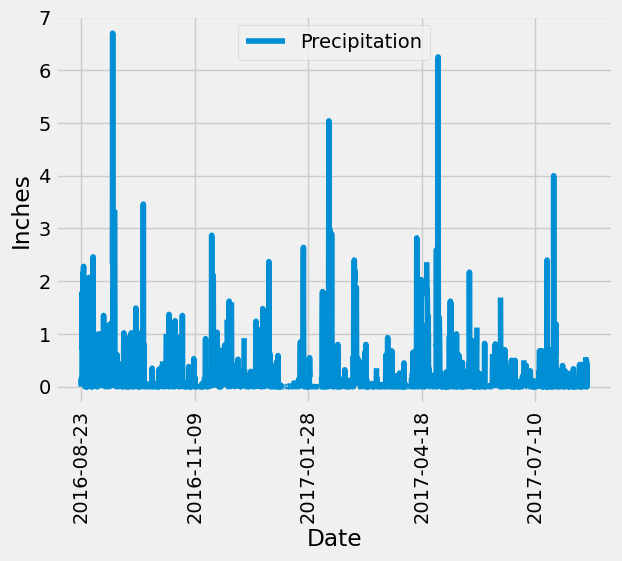

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
from datetime import datetime, timedelta
most_recent_date = '2017-08-23'

one_year_ago=datetime.strptime(most_recent_date, '%Y-%m-%d') - timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
last_year_data=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df=pd.DataFrame(last_year_data, columns=['Date', 'Precipitation'])

# # Sort the dataframe by date
last_year_df_sorted = last_year_df.sort_values(by='Date')

# # Use Pandas Plotting with Matplotlib to plot the data
last_year_df_sorted.plot(x='Date', y='Precipitation')
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Inches")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_prcp_summary=pd.DataFrame({
                                "count": last_year_df["Precipitation"].count(),
                                 "mean": last_year_df["Precipitation"].mean(),
                                 "std": last_year_df["Precipitation"].std(),
                                 "min" :last_year_df["Precipitation"].min(),
                                 "25%" :last_year_df["Precipitation"].quantile(0.25),
                                 "50%" :last_year_df["Precipitation"].quantile(0.50),
                                 "75%" :last_year_df["Precipitation"].quantile(0.75),
                                 "MAX" :last_year_df["Precipitation"].max(),
                               },index=['precipitation'])

last_year_prcp_summary.transpose()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
MAX,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations=session.query(Station.station,func.count(Measurement.station))\
                                .join(Measurement, Station.station == Measurement.station)\
                                .group_by(Station.station)\
                                .order_by(func.count(Station.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ave_high_low_temp=session.query(
        func.min(Measurement.tobs), 
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
        ).filter(Measurement.station=="USC00519281").all()
ave_high_low_temp

[(54.0, 85.0, 71.66378066378067)]

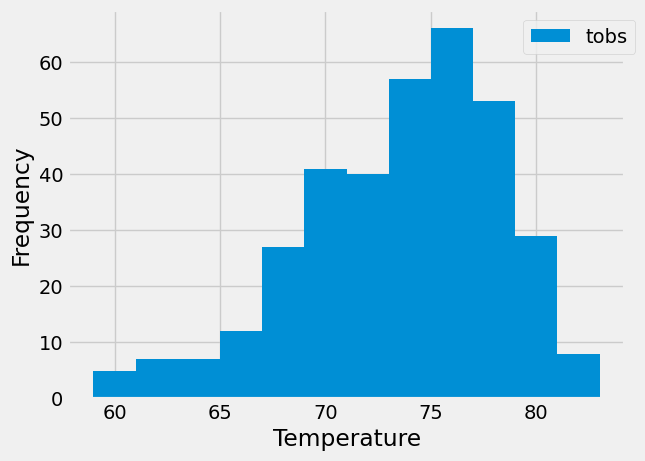

In [87]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tobs_data=session.query(Measurement.tobs).\
                                filter(Measurement.date >= one_year_ago,Measurement.station =="USC00519281").\
                                order_by(Measurement.date).all()

tobs_np_data=np.array(last_year_tobs_data)
plt.hist(tobs_np_data,bins=12,label='tobs')

plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(bbox_to_anchor=(0.8, 1))
plt.show()

# Close Session

In [16]:
# Close Session
session.close()